## [Indigenous knowledge networks in the face of global change](https://www.pnas.org/content/116/20/9913)

### Datos!

In [37]:
import camelot

In [38]:
tables1 = camelot.read_pdf('datos/1.pdf')
tables2 = camelot.read_pdf('datos/2.pdf')
tables3 = camelot.read_pdf('datos/3.pdf')
tables4 = camelot.read_pdf('datos/4.pdf')
tables5 = camelot.read_pdf('datos/5.pdf')
tables6 = camelot.read_pdf('datos/6.pdf')
tables7 = camelot.read_pdf('datos/7.pdf')
tables8 = camelot.read_pdf('datos/8.pdf')
tables9 = camelot.read_pdf('datos/9.pdf')
tables10 = camelot.read_pdf('datos/10.pdf')

In [39]:
for T in [tables1,tables2,tables3,tables4,tables5,tables6,tables7,tables8,tables9,tables10]:
    print("Total tables extracted:", T.n)

Total tables extracted: 1
Total tables extracted: 1
Total tables extracted: 1
Total tables extracted: 1
Total tables extracted: 1
Total tables extracted: 1
Total tables extracted: 1
Total tables extracted: 1
Total tables extracted: 1
Total tables extracted: 1


In [40]:
frames = []
for T in [tables1,tables2,tables3,tables4,tables5,tables6,tables7,tables8,tables9,tables10]:
    frames+=[T[0].df]

In [41]:
import pandas as pd

In [42]:
result = pd.concat(frames)

In [43]:
result.columns = result.iloc[0]
result = result[1:]

In [44]:
result

0                Community         Plant_species  \
1                   Zabalo         Aiphanes ulei   
2                   Zabalo  Astrocaryum chambira   
3                   Zabalo  Astrocaryum chambira   
4                   Zabalo  Astrocaryum chambira   
5                   Zabalo  Astrocaryum chambira   
..                     ...                   ...   
82  Sta. Rosa de Maravilla     Oenocarpus bataua   
83  Sta. Rosa de Maravilla     Oenocarpus mapora   
84  Sta. Rosa de Maravilla     Oenocarpus mapora   
85  Sta. Rosa de Maravilla     Oenocarpus mapora   
86  Sta. Rosa de Maravilla     Oenocarpus mapora   

0                                 Plant_service  
1     Stem_Utensils & tools_Hunting and fishing  
2             Fruit_Cultural_Personal adornment  
3                          Seed_Human food_Food  
4   Spear leaf_Cultural_Clothes and accessories  
5        Spear leaf_Cultural_Personal adornment  
..                                          ...  
82                     Stem_Other_Miscellaneous  
83              Entire leaf_Construction_Thatch  
84                   Fruit_Human food_Beverages  
85                        Fruit_Human food_Oils  
86                     Stem_Construction_Houses  

[877 rows x 3 columns]

In [45]:
comunidades = set(result['Community'])

In [46]:
comunidades

{'Sta. Rosa de Maravilla',
 'Tres Arroyos',
 'Union Progreso',
 'Villa Santiago',
 'Villanueva',
 'Wayusentsa',
 'Yamayakat',
 'Yucuna',
 'Zabalo'}

In [47]:
dict_com_species_services = {}

for com in comunidades:
    result_com = result[result['Community']==com]
    species = list(result_com['Plant_species'])
    services = list(result_com['Plant_service'])
    
    dict_com_species_services[com] = {'species':species,'services':services}

In [48]:
dict_com_species_services['Zabalo']

{'species': ['Aiphanes ulei',
  'Astrocaryum chambira',
  'Astrocaryum chambira',
  'Astrocaryum chambira',
  'Astrocaryum chambira',
  'Astrocaryum chambira',
  'Astrocaryum chambira',
  'Astrocaryum chambira',
  'Astrocaryum chambira',
  'Astrocaryum jauari',
  'Astrocaryum jauari',
  'Astrocaryum urostachys',
  'Astrocaryum urostachys',
  'Astrocaryum urostachys',
  'Astrocaryum urostachys',
  'Attalea butyracea',
  'Attalea butyracea',
  'Attalea butyracea',
  'Attalea insignis',
  'Attalea insignis',
  'Attalea maripa',
  'Attalea maripa',
  'Attalea maripa',
  'Attalea maripa',
  'Attalea maripa',
  'Attalea maripa',
  'Bactris concinna',
  'Bactris concinna',
  'Bactris concinna',
  'Bactris corossilla',
  'Bactris maraja',
  'Bactris maraja',
  'Desmoncus giganteus',
  'Euterpe precatoria',
  'Euterpe precatoria',
  'Euterpe precatoria',
  'Euterpe precatoria',
  'Euterpe precatoria',
  'Geonoma brongniartii',
  'Geonoma macrostachys',
  'Geonoma maxima',
  'Geonoma stricta',
 

### construyamos redes bipartitas!!!

In [49]:
import networkx as nx
from networkx.algorithms import bipartite

redes_bipartitas = {}

for com in comunidades:
    
    B = nx.Graph()
    B.add_nodes_from(dict_com_species_services[com]['species'], bipartite=0)
    B.add_nodes_from(dict_com_species_services[com]['services'], bipartite=1)
    B.add_edges_from([(spe,ser) for spe,ser in zip(dict_com_species_services[com]['species'],dict_com_species_services[com]['services'])])
    redes_bipartitas[com]=B

In [50]:
redes_bipartitas

{'Villanueva': <networkx.classes.graph.Graph at 0x17f3b43b640>,
 'Yamayakat': <networkx.classes.graph.Graph at 0x17f3b43b280>,
 'Zabalo': <networkx.classes.graph.Graph at 0x17f3a65f0a0>,
 'Tres Arroyos': <networkx.classes.graph.Graph at 0x17f37b359d0>,
 'Villa Santiago': <networkx.classes.graph.Graph at 0x17f3b5e85e0>,
 'Sta. Rosa de Maravilla': <networkx.classes.graph.Graph at 0x17f3cf62f70>,
 'Union Progreso': <networkx.classes.graph.Graph at 0x17f3cf62eb0>,
 'Wayusentsa': <networkx.classes.graph.Graph at 0x17f3b7e4c70>,
 'Yucuna': <networkx.classes.graph.Graph at 0x17f3b7e4070>}

In [51]:
for com in redes_bipartitas.keys():
    print(com,len(redes_bipartitas[com]))

Villanueva 69
Yamayakat 55
Zabalo 54
Tres Arroyos 32
Villa Santiago 58
Sta. Rosa de Maravilla 28
Union Progreso 32
Wayusentsa 67
Yucuna 82


In [52]:
B=redes_bipartitas['Yucuna']

In [54]:
B.nodes()

NodeView(('Astrocaryum chambira', 'Astrocaryum ciliatum', 'Astrocaryum jauari', 'Attalea maripa', 'Attalea microcarpa', 'Attalea peruviana', 'Attalea septuagenata', 'Bactris bidentula', 'Bactris maraja', 'Desmoncus polyacanthos', 'Euterpe catinga', 'Euterpe precatoria', 'Iriartea deltoidea', 'Iriartella setigera', 'Lepidocaryum tenue', 'Manicaria saccifera', 'Mauritia carana', 'Mauritia flexuosa', 'Mauritiella armata', 'Oenocarpus bacaba', 'Oenocarpus balickii', 'Oenocarpus bataua', 'Oenocarpus circumtextus', 'Oenocarpus mapora', 'Socratea exorrhiza', 'Fruit_Cultural_Personal adornment', 'Fruit_Cultural_Ritual', 'Fruit_Human food_Food', 'Seed_Human food_Beverages', 'Seed_Human food_Food', 'Seed_Other_Miscellaneous', 'Spear leaf_Cultural_Clothes and accessories', 'Spear leaf_Cultural_Personal adornment', 'Spear leaf_Utensils & tools_Domestic utensils', 'Spear leaf_Utensils & tools_Hunting and fishing', 'Spear leaf_Utensils & tools_Rope', 'Stem_Other_Miscellaneous', 'Leaf rachis_Utensils

In [55]:
bottom_nodes, top_nodes = bipartite.sets(B)

In [56]:
list(bottom_nodes)[:10]

['Iriartea deltoidea',
 'Attalea microcarpa',
 'Astrocaryum chambira',
 'Oenocarpus mapora',
 'Manicaria saccifera',
 'Oenocarpus bacaba',
 'Mauritiella armata',
 'Euterpe catinga',
 'Astrocaryum ciliatum',
 'Attalea peruviana']

In [57]:
list(top_nodes)[:10]

['Stem_Construction_Other',
 'Inflorescence_Cultural_Recreational',
 'Entire plant_Human food_Food additives',
 'Seed_Human food_Food',
 'Petiole_Utensils & tools_Domestic utensils',
 'Spear leaf_Cultural_Ritual',
 'Stem_Utensils & tools_Hunting and fishing',
 'Fruit_Animal food_Fish bait',
 'Stem_Construction_Bridges',
 'Stem_Construction_Transportation']

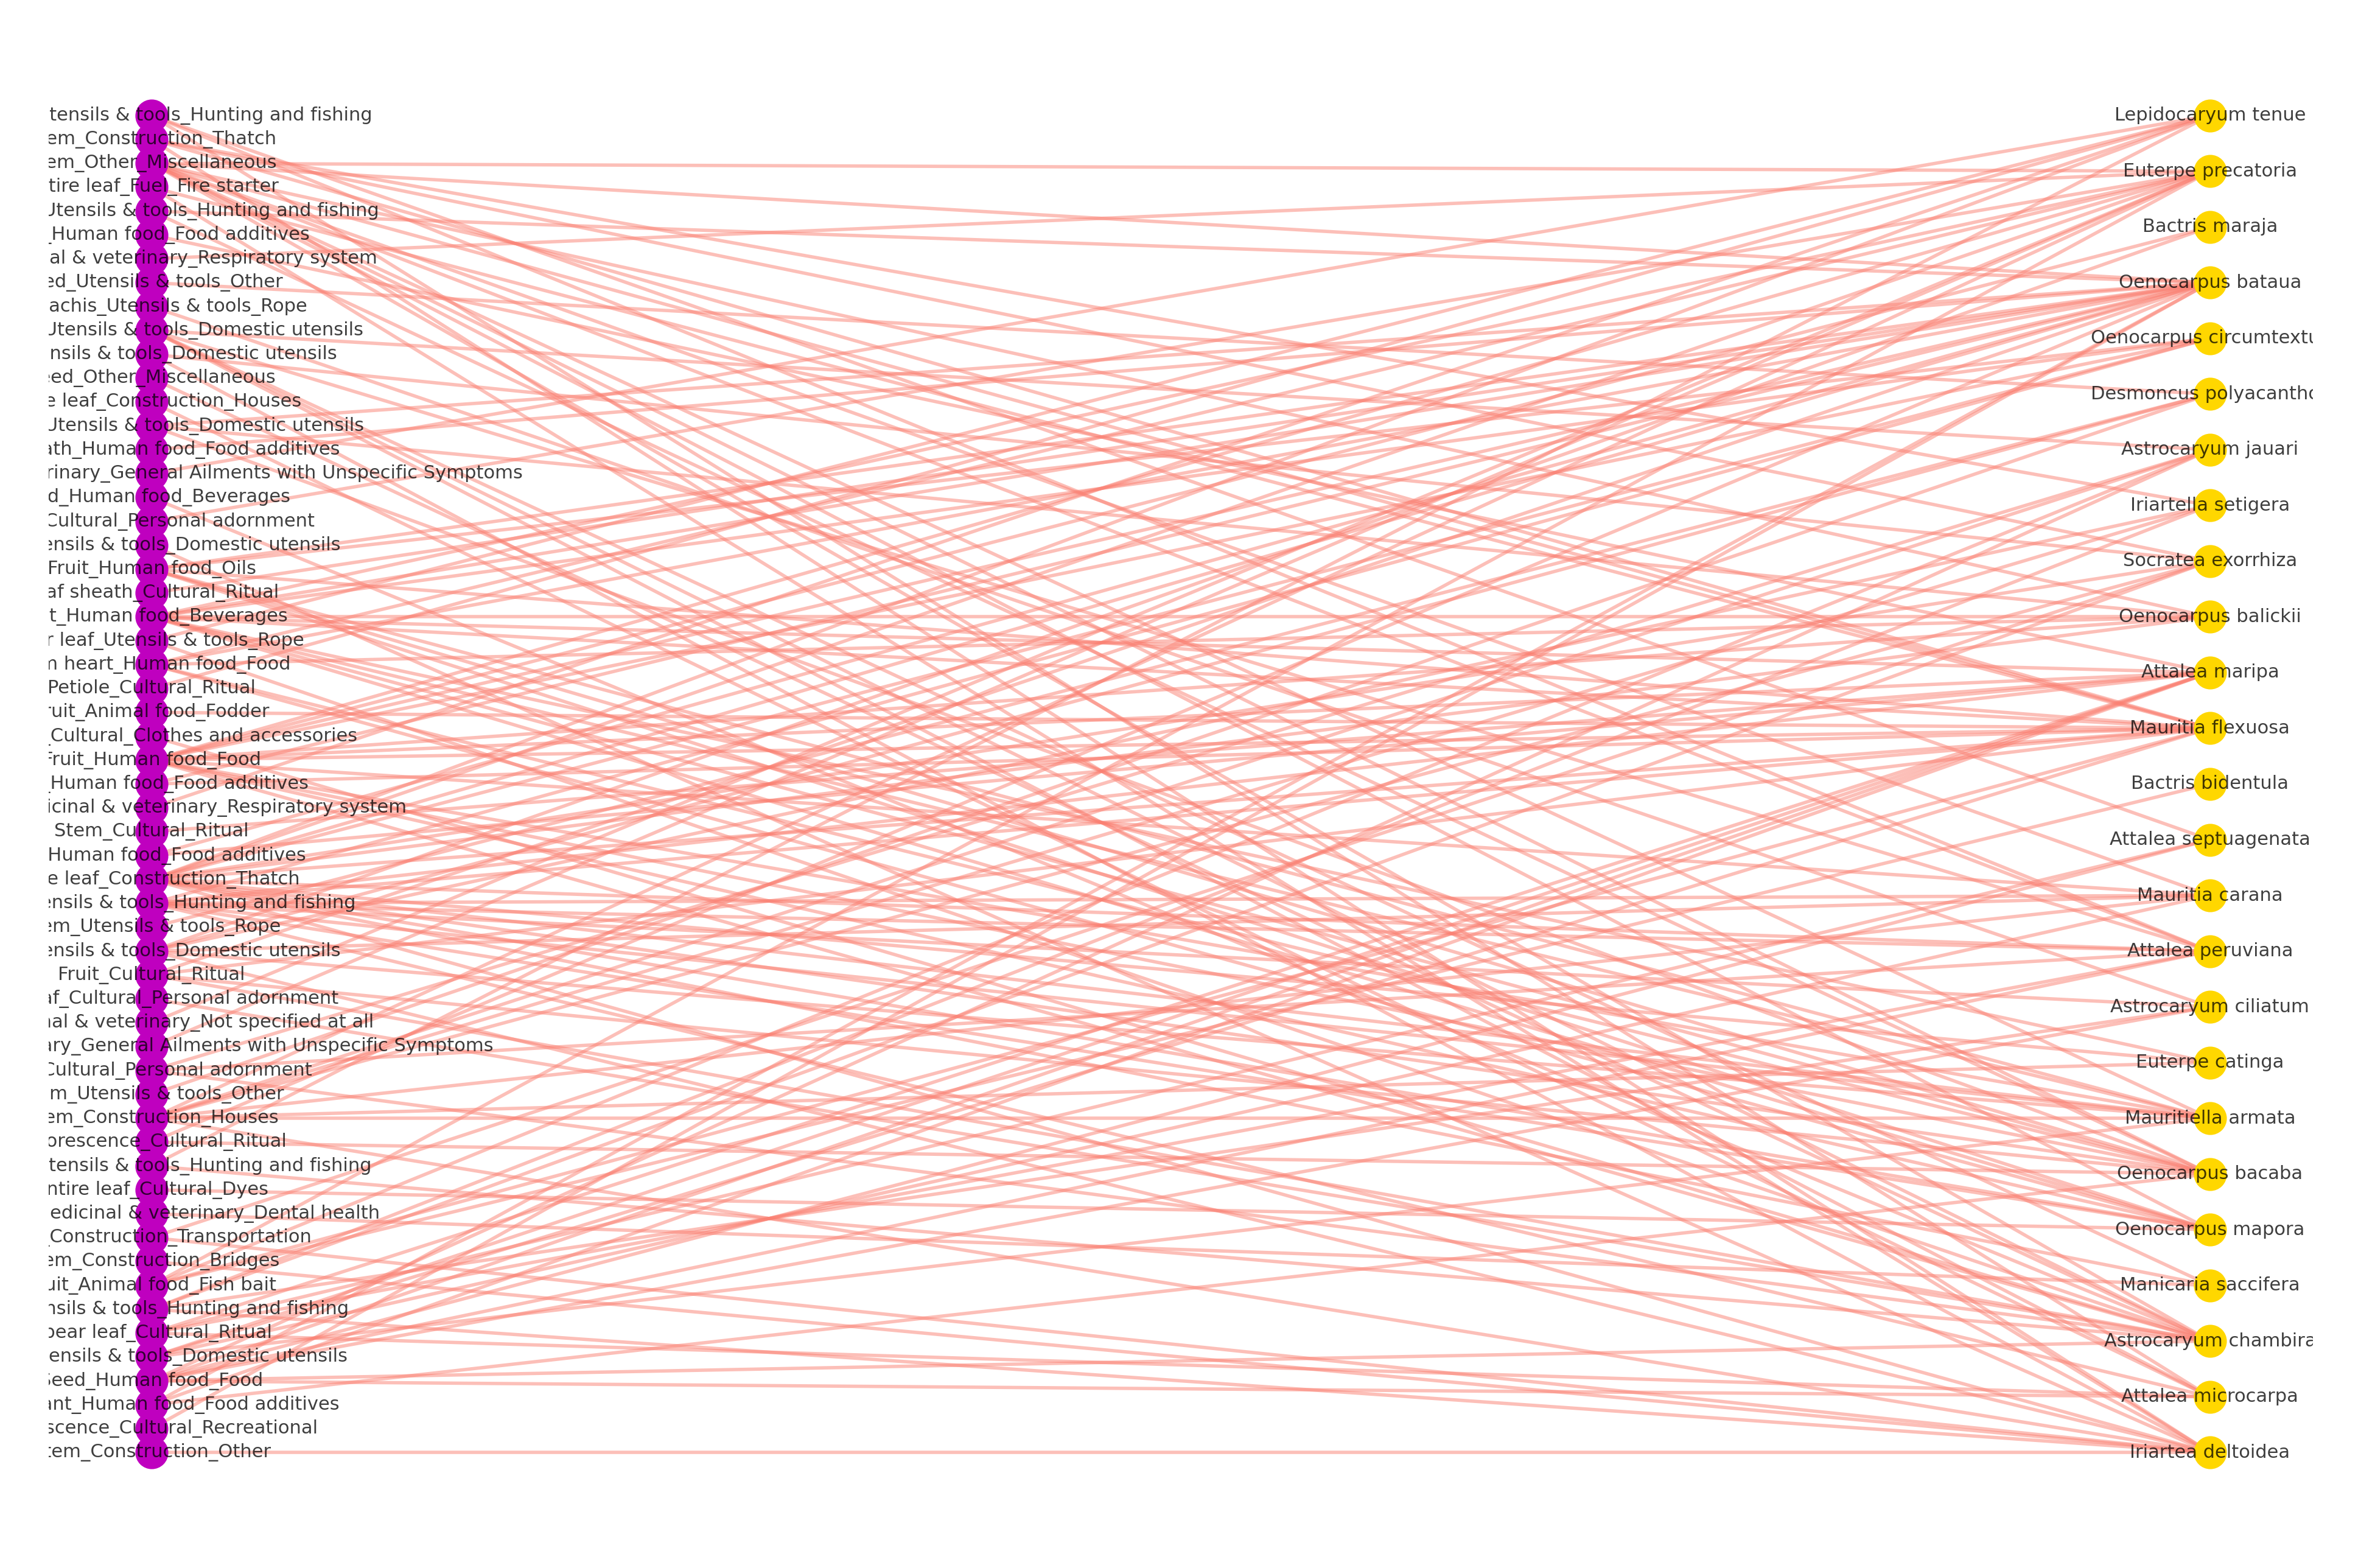

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
labels={i:i for i in B.nodes}
pos = nx.bipartite_layout(B,top_nodes)
#species = [node for node in species if node in s.nodes()]
#services = [node for node in services if node in s.nodes()]
nx.draw_networkx_nodes(B, pos, nodelist=bottom_nodes,node_size = 15, node_color='gold',label='species') 
nx.draw_networkx_nodes(B, pos, nodelist=top_nodes,node_size = 15, node_color='m',label='services')
nx.draw_networkx_edges(B, pos, alpha=0.5,width=0.5,edge_color='salmon')
nx.draw_networkx_labels(B,pos,labels,alpha=0.75,font_size=2.75,font_color='k')
plt.axis('off')
plt.show()

In [62]:
D = dict(B.degree())

In [64]:
D_species = {key:D[key] for key in bottom_nodes}

In [65]:
D_species_ordered = {k: v for k, v in sorted(D_species.items(), key=lambda item: item[1],reverse=True)}

In [67]:
D_species_ordered

{'Oenocarpus bataua': 16,
 'Mauritia flexuosa': 13,
 'Astrocaryum chambira': 12,
 'Iriartea deltoidea': 11,
 'Oenocarpus bacaba': 11,
 'Euterpe precatoria': 11,
 'Attalea maripa': 10,
 'Mauritiella armata': 9,
 'Oenocarpus mapora': 8,
 'Attalea peruviana': 8,
 'Attalea microcarpa': 6,
 'Mauritia carana': 6,
 'Oenocarpus balickii': 6,
 'Socratea exorrhiza': 6,
 'Lepidocaryum tenue': 6,
 'Astrocaryum jauari': 5,
 'Oenocarpus circumtextus': 5,
 'Astrocaryum ciliatum': 4,
 'Iriartella setigera': 4,
 'Desmoncus polyacanthos': 4,
 'Manicaria saccifera': 3,
 'Euterpe catinga': 3,
 'Attalea septuagenata': 3,
 'Bactris maraja': 2,
 'Bactris bidentula': 1}

In [68]:
D_services = {key:D[key] for key in top_nodes}

In [69]:
D_services_ordered = {k: v for k, v in sorted(D_services.items(), key=lambda item: item[1],reverse=True)}

In [70]:
D_services_ordered

{'Entire leaf_Construction_Thatch': 14,
 'Fruit_Human food_Food': 12,
 'Fruit_Human food_Beverages': 10,
 'Stem_Other_Miscellaneous': 10,
 'Petiole_Utensils & tools_Hunting and fishing': 9,
 'Stem_Construction_Houses': 8,
 'Seed_Human food_Food': 7,
 'Stem_Utensils & tools_Domestic utensils': 6,
 'Fruit_Human food_Oils': 6,
 'Palm heart_Human food_Food': 5,
 'Spear leaf_Utensils & tools_Domestic utensils': 5,
 'Petiole_Utensils & tools_Domestic utensils': 4,
 'Spear leaf_Cultural_Ritual': 4,
 'Stem_Utensils & tools_Hunting and fishing': 4,
 'Fruit_Animal food_Fish bait': 4,
 'Fruit_Cultural_Ritual': 4,
 'Stem_Construction_Thatch': 4,
 'Entire plant_Human food_Food additives': 3,
 'Fruit_Cultural_Personal adornment': 3,
 'Entire leaf_Utensils & tools_Domestic utensils': 3,
 'Entire leaf_Utensils & tools_Hunting and fishing': 3,
 'Stem_Construction_Transportation': 2,
 'Spear leaf_Utensils & tools_Hunting and fishing': 2,
 'Inflorescence_Cultural_Ritual': 2,
 'Fruit_Human food_Food addit

### proyecciones!

In [71]:
projected_species = bipartite.weighted_projected_graph(B, bottom_nodes)

In [72]:
projected_species.nodes()

NodeView(('Iriartea deltoidea', 'Attalea microcarpa', 'Astrocaryum chambira', 'Oenocarpus mapora', 'Manicaria saccifera', 'Oenocarpus bacaba', 'Mauritiella armata', 'Euterpe catinga', 'Astrocaryum ciliatum', 'Attalea peruviana', 'Mauritia carana', 'Attalea septuagenata', 'Bactris bidentula', 'Mauritia flexuosa', 'Attalea maripa', 'Oenocarpus balickii', 'Socratea exorrhiza', 'Iriartella setigera', 'Astrocaryum jauari', 'Desmoncus polyacanthos', 'Oenocarpus circumtextus', 'Oenocarpus bataua', 'Bactris maraja', 'Euterpe precatoria', 'Lepidocaryum tenue'))

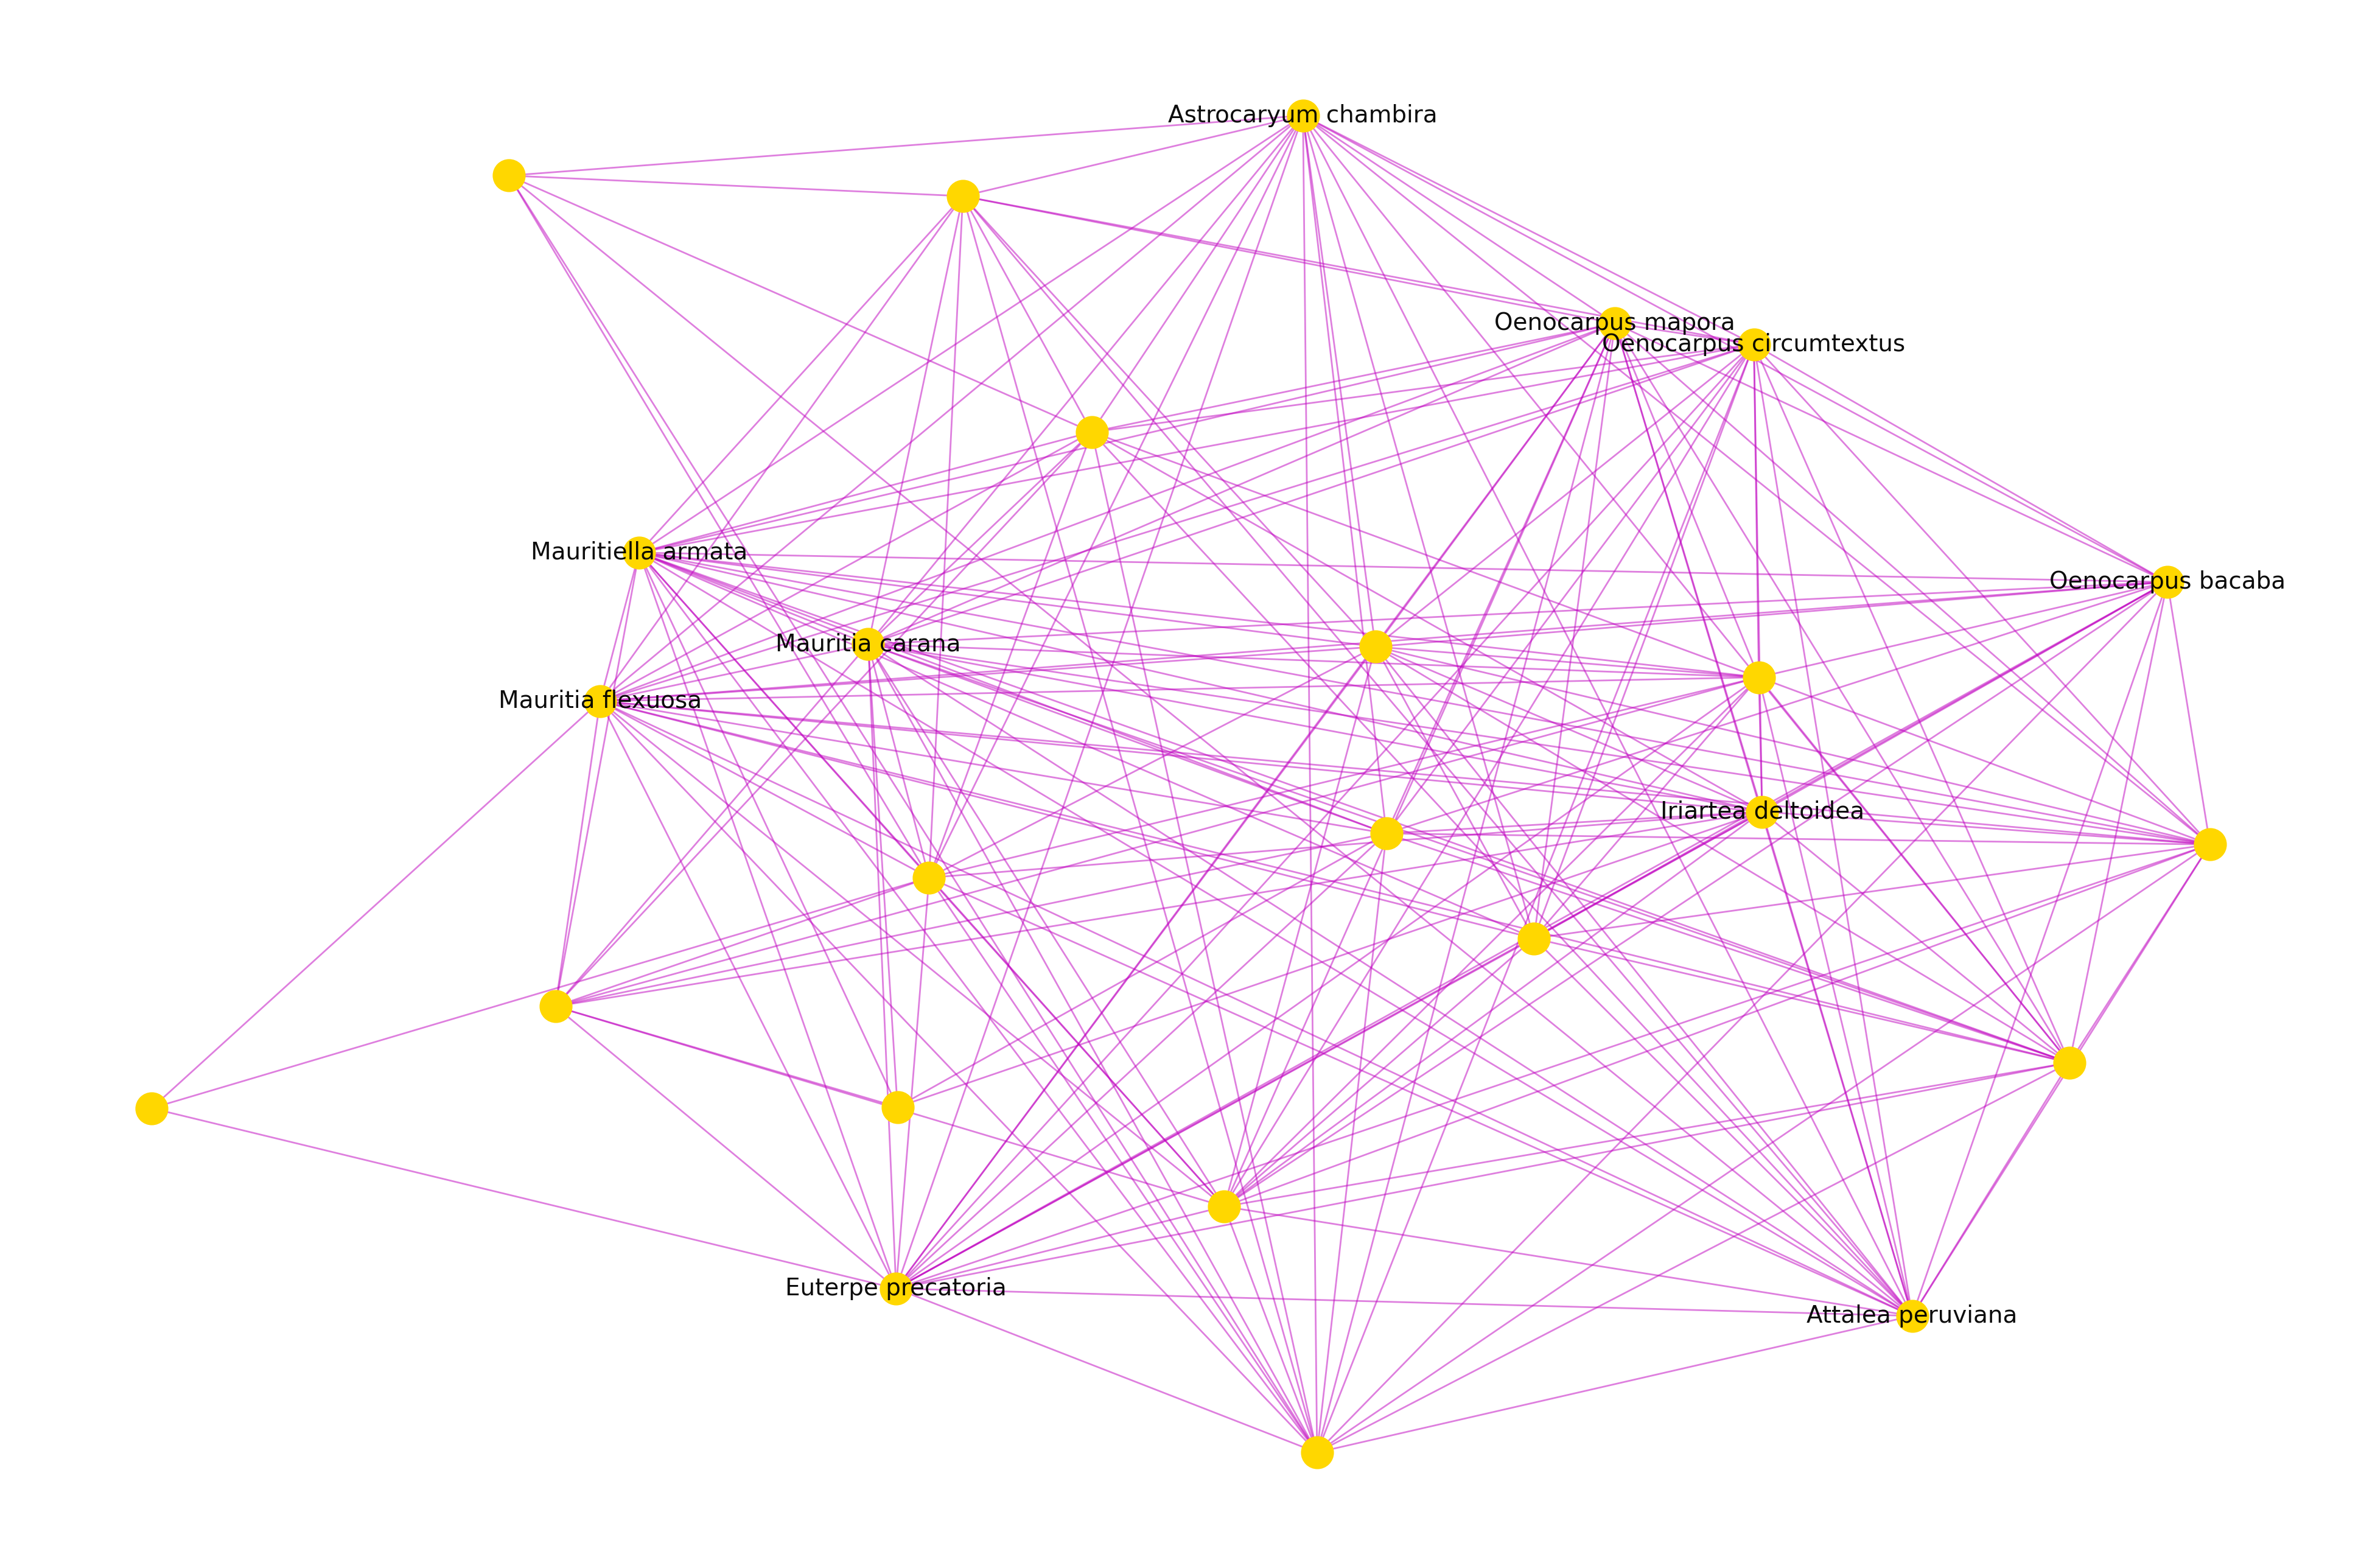

In [74]:
fig, ax = plt.subplots(dpi=800)
pos = nx.kamada_kawai_layout(projected_species)
## probar otros algoritmos! :)
centrality = dict(nx.closeness_centrality(projected_species))
## orden por centralidad!
ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
labels = {i:i for i in projected_species.nodes if i in list(zip(*list(ordered_centrality.items())[:10]))[0]}
nx.draw_networkx_nodes(projected_species, pos,node_size = 15, node_color='gold') 
nx.draw_networkx_edges(projected_species, pos, alpha=0.5,width=0.25,edge_color='m')
nx.draw_networkx_labels(projected_species,pos,labels,alpha=0.95,font_size=3.5,font_color='k')
plt.axis('off')
plt.show()

In [75]:
ordered_centrality

{'Mauritiella armata': 0.9230769230769231,
 'Mauritia flexuosa': 0.9230769230769231,
 'Attalea peruviana': 0.8571428571428571,
 'Mauritia carana': 0.8571428571428571,
 'Euterpe precatoria': 0.8571428571428571,
 'Iriartea deltoidea': 0.8275862068965517,
 'Oenocarpus mapora': 0.8275862068965517,
 'Oenocarpus circumtextus': 0.8275862068965517,
 'Astrocaryum chambira': 0.8,
 'Oenocarpus bacaba': 0.7741935483870968,
 'Euterpe catinga': 0.7741935483870968,
 'Attalea maripa': 0.7741935483870968,
 'Oenocarpus balickii': 0.7741935483870968,
 'Socratea exorrhiza': 0.7741935483870968,
 'Oenocarpus bataua': 0.7741935483870968,
 'Manicaria saccifera': 0.75,
 'Astrocaryum jauari': 0.75,
 'Astrocaryum ciliatum': 0.7058823529411765,
 'Bactris maraja': 0.7058823529411765,
 'Lepidocaryum tenue': 0.7058823529411765,
 'Attalea microcarpa': 0.6666666666666666,
 'Iriartella setigera': 0.6486486486486487,
 'Attalea septuagenata': 0.5581395348837209,
 'Desmoncus polyacanthos': 0.5333333333333333,
 'Bactris bi

In [76]:
projected_services = bipartite.weighted_projected_graph(B, top_nodes)

In [77]:
projected_services.nodes()

NodeView(('Stem_Construction_Other', 'Inflorescence_Cultural_Recreational', 'Entire plant_Human food_Food additives', 'Seed_Human food_Food', 'Petiole_Utensils & tools_Domestic utensils', 'Spear leaf_Cultural_Ritual', 'Stem_Utensils & tools_Hunting and fishing', 'Fruit_Animal food_Fish bait', 'Stem_Construction_Bridges', 'Stem_Construction_Transportation', 'Palm heart_Medicinal & veterinary_Dental health', 'Entire leaf_Cultural_Dyes', 'Spear leaf_Utensils & tools_Hunting and fishing', 'Inflorescence_Cultural_Ritual', 'Stem_Construction_Houses', 'Stem_Utensils & tools_Other', 'Fruit_Cultural_Personal adornment', 'Root_Medicinal & veterinary_General Ailments with Unspecific Symptoms', 'Root_Medicinal & veterinary_Not specified at all', 'Spear leaf_Cultural_Personal adornment', 'Fruit_Cultural_Ritual', 'Stem_Utensils & tools_Domestic utensils', 'Stem_Utensils & tools_Rope', 'Petiole_Utensils & tools_Hunting and fishing', 'Entire leaf_Construction_Thatch', 'Fruit_Human food_Food additives'

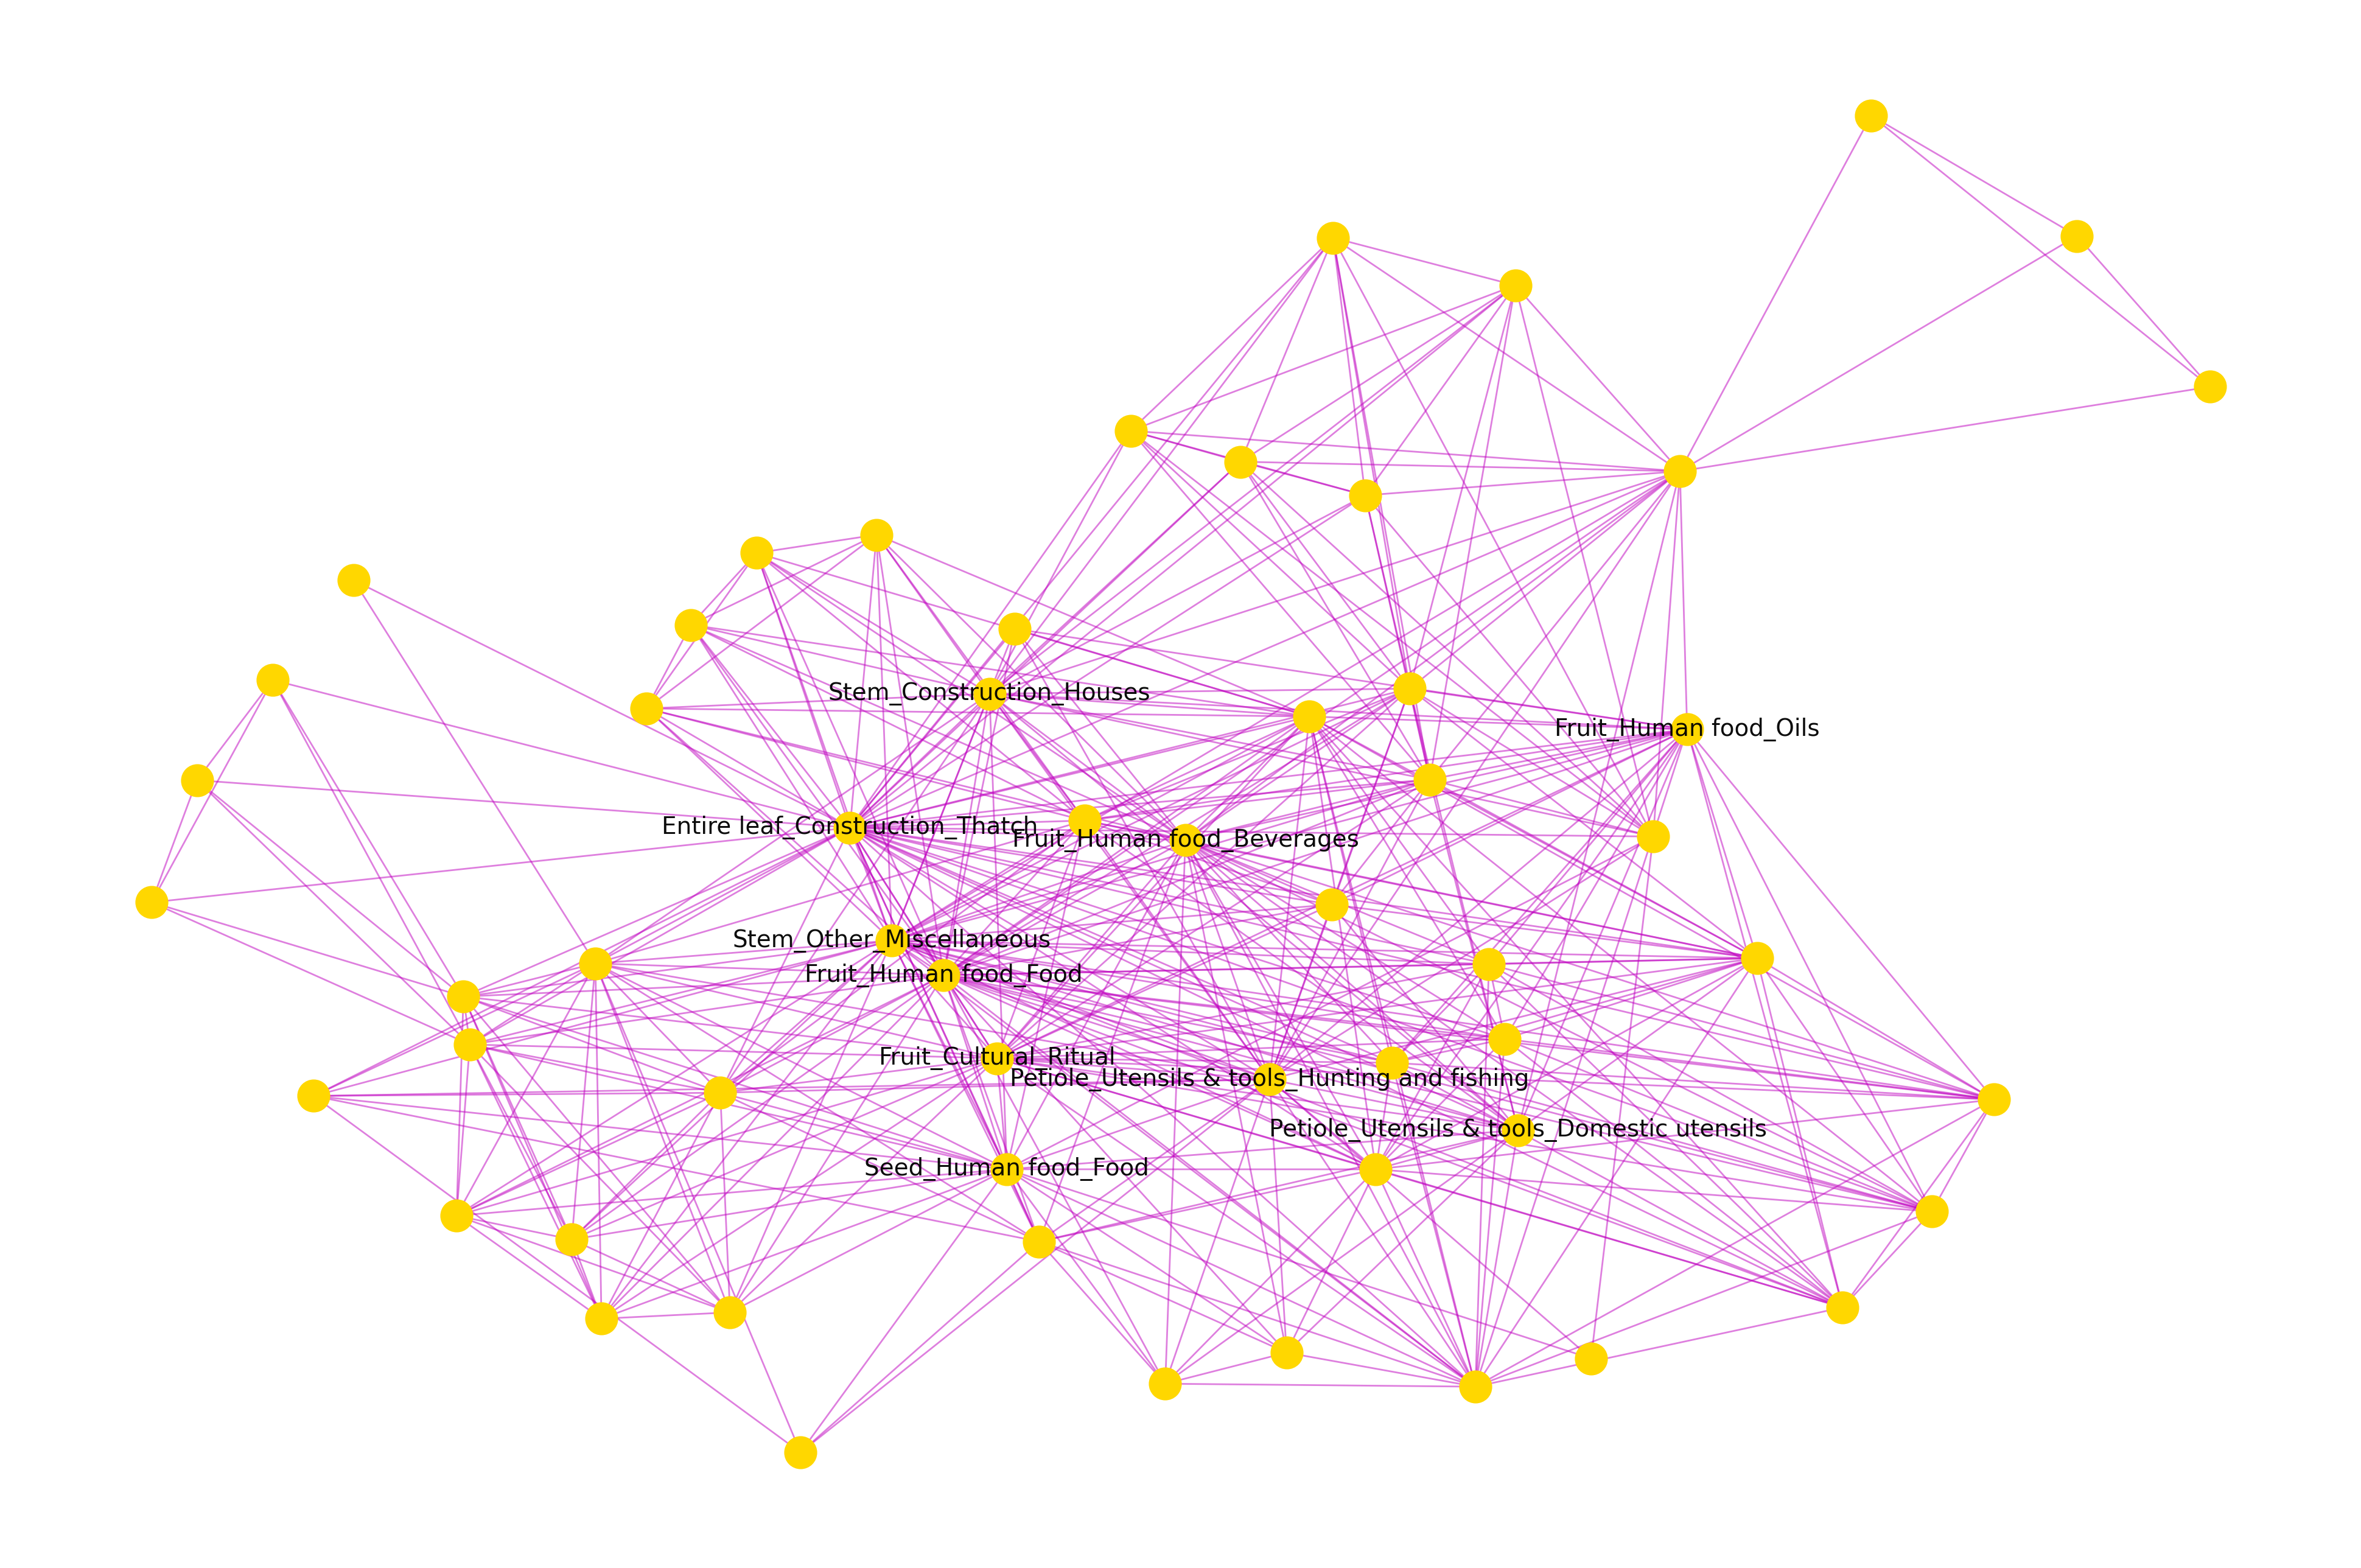

In [78]:
fig, ax = plt.subplots(dpi=800)
pos = nx.kamada_kawai_layout(projected_services)
## probar otros algoritmos! :)
centrality = dict(nx.closeness_centrality(projected_services))
## orden por centralidad!
ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
labels = {i:i for i in projected_services.nodes if i in list(zip(*list(ordered_centrality.items())[:10]))[0]}
nx.draw_networkx_nodes(projected_services, pos,node_size = 15, node_color='gold') 
nx.draw_networkx_edges(projected_services, pos, alpha=0.5,width=0.25,edge_color='m')
nx.draw_networkx_labels(projected_services,pos,labels,alpha=0.95,font_size=3.5,font_color='k')
plt.axis('off')
plt.show()

In [79]:
ordered_centrality

{'Entire leaf_Construction_Thatch': 0.835820895522388,
 'Fruit_Human food_Food': 0.7777777777777778,
 'Stem_Other_Miscellaneous': 0.7671232876712328,
 'Fruit_Human food_Beverages': 0.7,
 'Petiole_Utensils & tools_Hunting and fishing': 0.6666666666666666,
 'Fruit_Cultural_Ritual': 0.6588235294117647,
 'Stem_Construction_Houses': 0.6436781609195402,
 'Fruit_Human food_Oils': 0.6363636363636364,
 'Seed_Human food_Food': 0.6292134831460674,
 'Petiole_Utensils & tools_Domestic utensils': 0.6086956521739131,
 'Palm heart_Human food_Food': 0.6086956521739131,
 'Entire leaf_Fuel_Fire starter': 0.6086956521739131,
 'Stem_Construction_Thatch': 0.6086956521739131,
 'Stem_Utensils & tools_Domestic utensils': 0.6021505376344086,
 'Entire plant_Human food_Food additives': 0.5957446808510638,
 'Fruit_Animal food_Fish bait': 0.5957446808510638,
 'Fruit_Human food_Food additives': 0.5957446808510638,
 'Seed_Human food_Food additives': 0.5957446808510638,
 'Spear leaf_Utensils & tools_Domestic utensils'